<a href="https://colab.research.google.com/github/Nikhaikal/Nikhaikal/blob/main/ShapeDetection_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving shapes1.jpeg to shapes1.jpeg
Image shape: (320, 500, 3)


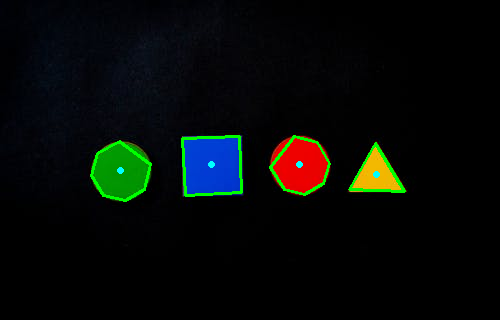

In [2]:
# Example 7.2 - Shape Detection (Google Colab Version)

import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files
from google.colab.patches import cv2_imshow  # Optional for displaying with OpenCV style

# Upload image
uploaded = files.upload()

# Load uploaded image
img = cv2.imread("shapes1.jpeg")

# Check if image loaded
if img is None:
    print("Image not found or failed to load.")
else:
    height, width, c = img.shape
    print("Image shape:", img.shape)

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.medianBlur(gray, 5)
    ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    cnts, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for c in cnts:
        area = cv2.contourArea(c)
        if area > 10:
            epsilon = 0.04 * cv2.arcLength(c, True)
            approx = cv2.approxPolyDP(c, epsilon, True)

            cv2.drawContours(img, [approx], -1, (0, 255, 0), 2)

            M = cv2.moments(c)
            if M["m00"] != 0:
                cX = int((M["m10"] / M["m00"]))
                cY = int((M["m01"] / M["m00"]))
                cv2.circle(img, (cX, cY), 2, (255, 255, 0), 2)

    # Display the image
    cv2_imshow(img)  # Use this for OpenCV-style output
    # OR use matplotlib (comment above line and uncomment below)
    # plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    # plt.axis('off')
    # plt.show()
